<a href="https://colab.research.google.com/github/aliahalotaibi73/week5_exercises/blob/main/Exponential_smoothing_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exponential smoothing**



##  install these libraries using pip:



In [ ]:
!pip install pandas matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Loading dataset

In [ ]:
data = pd.read_csv('/content/traffic.csv', parse_dates=['DateTime'], index_col='DateTime')
print(data.head())

                     Junction  Vehicles           ID
DateTime                                            
2015-11-01 00:00:00         1        15  20151101001
2015-11-01 01:00:00         1        13  20151101011
2015-11-01 02:00:00         1        10  20151101021
2015-11-01 03:00:00         1         7  20151101031
2015-11-01 04:00:00         1         9  20151101041


In [ ]:
data = data.iloc[:500]

In [ ]:
data = data.drop(['Junction', 'ID'], axis=1)

In [ ]:
data.head()

,Vehicles
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9


## Visualizing the data





In [ ]:
#data['DateTime'] = pd.to_datetime(data.date_time,format='%Y-%m-%d %H:%M:%S',infer_datetime_format=True)

<ipython-input-11-e140081e1a21>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['DateTime'] = pd.to_datetime(data.DateTime,format='%Y-%m-%d %H:%M:%S',infer_datetime_format=True)


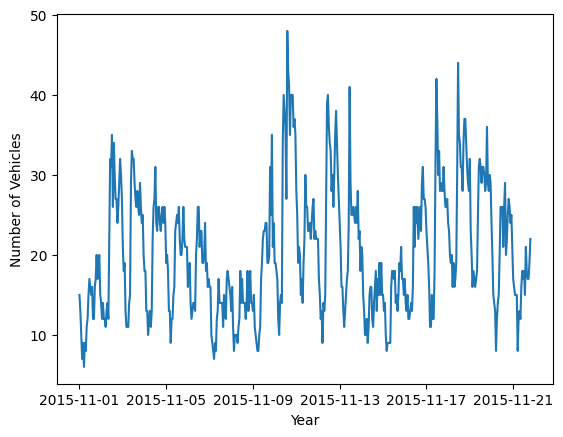

In [ ]:
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.show()

#**Single Exponential smoothing**





In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(data)
model_single_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions





In [ ]:
forecast_single = model_single_fit.forecast(6)
print(forecast_single)

2015-11-21 20:00:00    21.873341
2015-11-21 21:00:00    21.873341
2015-11-21 22:00:00    21.873341
2015-11-21 23:00:00    21.873341
2015-11-22 00:00:00    21.873341
2015-11-22 01:00:00    21.873341
Freq: H, dtype: float64


## Visualize Single Exponential Smoothing




In [ ]:
forecast_single = model_single_fit.forecast(20)

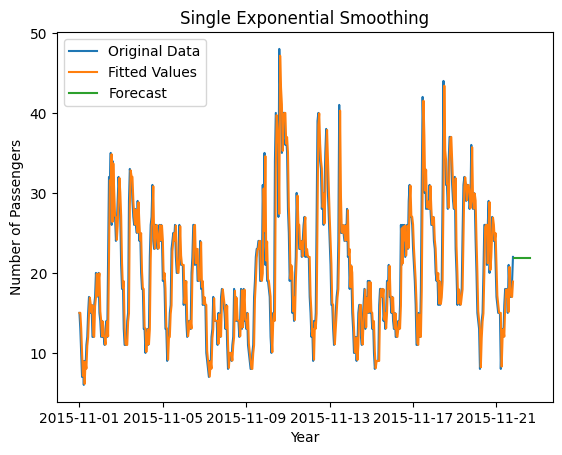

In [ ]:
plt.plot(data, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()

#**Double Exponential Smoothing**




In [ ]:
from statsmodels.tsa.api import Holt

model_double = Holt(data)
model_double_fit = model_double.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [ ]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)

2015-11-21 20:00:00    21.927524
2015-11-21 21:00:00    21.938688
2015-11-21 22:00:00    21.949853
2015-11-21 23:00:00    21.961018
2015-11-22 00:00:00    21.972183
2015-11-22 01:00:00    21.983348
Freq: H, dtype: float64


## Visualize Double Exponential Smoothing




In [ ]:
forecast_double = model_double_fit.forecast(40)

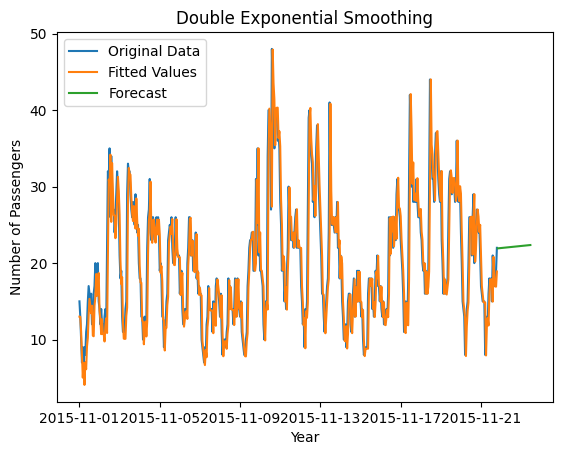

In [ ]:
plt.plot(data, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()

#**Holt-Winter’s Seasonal Smoothing**






In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    data, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [ ]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)

2015-11-21 20:00:00    21.899819
2015-11-21 21:00:00    24.411694
2015-11-21 22:00:00    27.021475
2015-11-21 23:00:00    27.021718
2015-11-22 00:00:00    25.460868
2015-11-22 01:00:00    23.080138
Freq: H, dtype: float64


## Visualize Triple Exponential Smoothing




In [ ]:
forecast_triple = model_triple_fit.forecast(40)

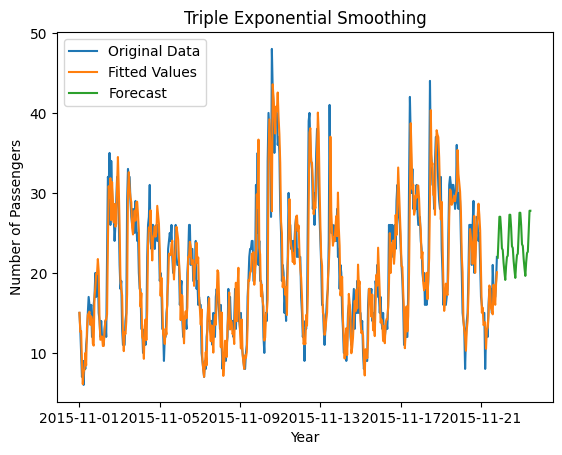

In [ ]:
plt.plot(data, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()

##**Well done :)**